In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider

# Import de cada imagem

In [10]:
image1 = np.load('reconstruction_3d_2_ang.npy');

In [11]:
image2 = np.load('reconstruction_3d_4_ang.npy');

In [12]:
image3 = np.load('reconstruction_3d_5_ang.npy');

In [13]:
image4 = np.load('reconstruction_3d_10_ang.npy');

In [83]:
image5 = np.load('reconstruction_3d_20_ang.npy');

In [55]:
image6 = np.load('reconstruction_3d_25_ang.npy');

KeyboardInterrupt: 

In [84]:
image5_centered = np.load('reconstruction_3d_20_ang_centered.npy'); 

# Imagem Interativa

In [60]:
def create_image_viewer(data):
    """
    Cria uma função para visualizar imagens a partir de um array 3D.

    Parâmetros:
    - data: np.ndarray
        Array 3D contendo as imagens.

    Retorna:
    - Função que mostra a imagem no índice especificado.
    """
    def show_image(index):
        """
        Função para mostrar a imagem no índice especificado.

        Parâmetros:
        - index: int
            Índice da imagem a ser exibida.
        """
        plt.imshow(data[:, :, index], cmap='gray')
        plt.title(f'Foto {index + 1}')
        plt.axis('off')
        plt.show()
    
    return show_image

#Input dos dados
data = image6

# Criar uma função de visualização para o array 'data'
show_image = create_image_viewer(data) 

# Criar um widget interativo para escolher o índice da imagem
interact(show_image, index=IntSlider(min=0, max=data.shape[2]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=949), Output()), _dom_classes=('widget-inter…

<function __main__.create_image_viewer.<locals>.show_image(index)>

# Armazenar as imagens em um dicionário

In [17]:
imagens = {
    'n = 2': image1,
    'n = 4': image2,
    'n = 5': image3,
    'n = 10': image4,
    'n = 20': image5,
    'n = 25': image6
}

# Plots de cortes das imagens por número de fotos

In [18]:

def plot_slices(index):
    # Defina o número de linhas e colunas
    n_rows = 2
    n_cols = 3
    
    # Crie a grade de subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    
    # Preencha os subplots
    for i, (key, data) in enumerate(imagens.items()):
        ax = axes.flat[i]  # Acessa cada subplot
        ax.imshow(data[:, :, index], cmap='gray')
        ax.set_title(f'{key}, Slice {index}')
        ax.axis('off')  # Desliga os eixos

    # Desliga os eixos dos subplots que não estão sendo utilizados
    for j in range(i + 1, n_rows * n_cols):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.show()

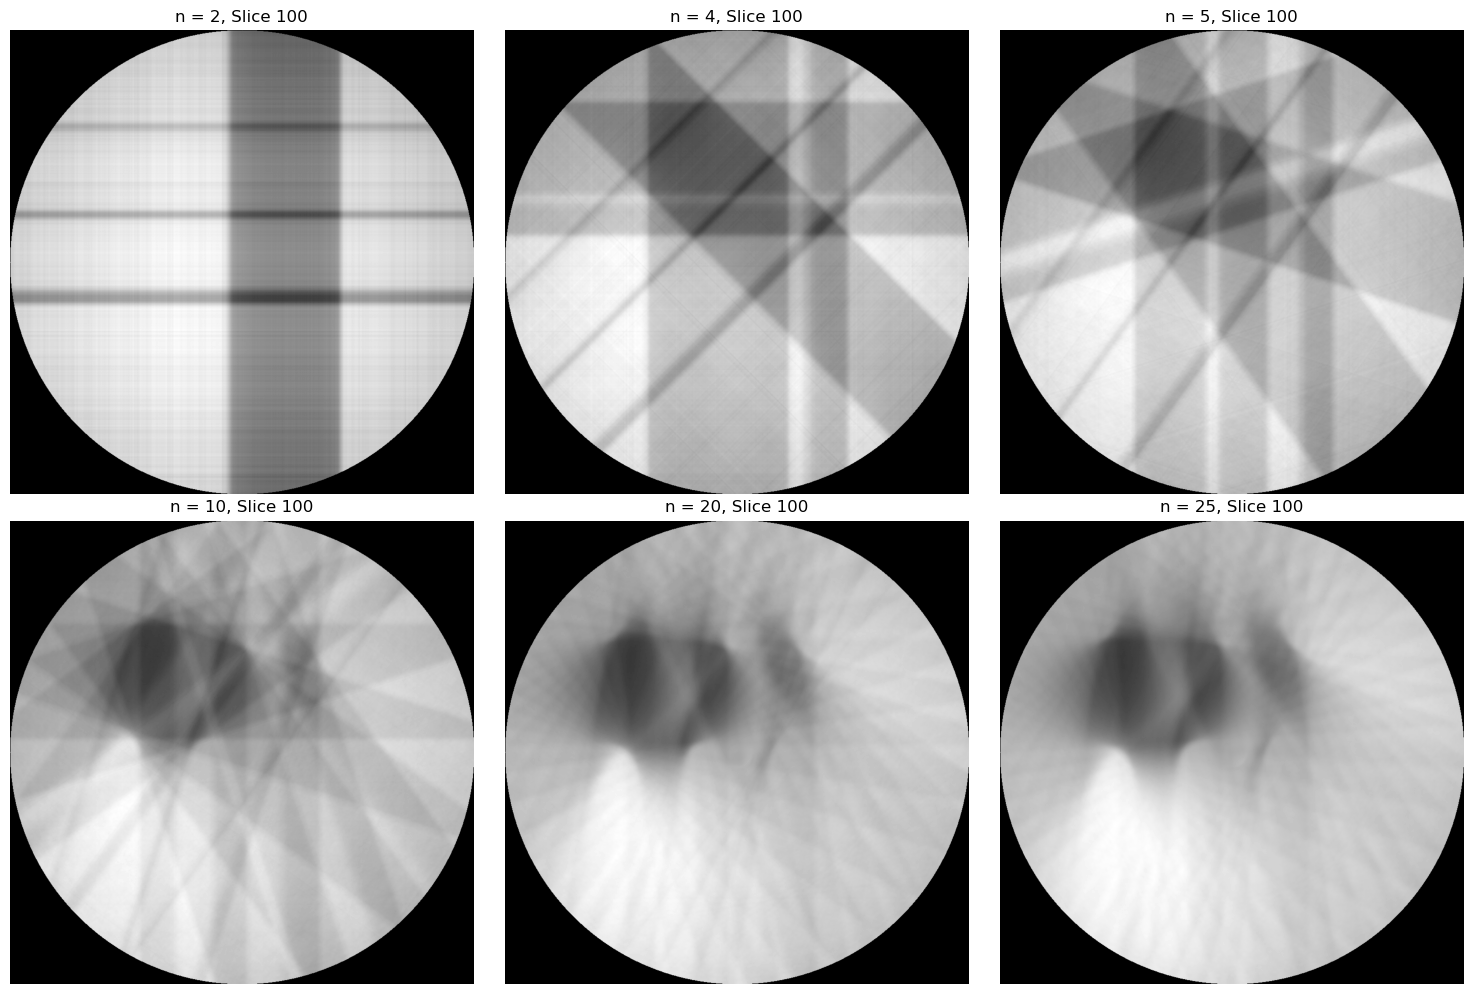

In [21]:
# Chame a função para plotar o corte desejado 
plot_slices(100)

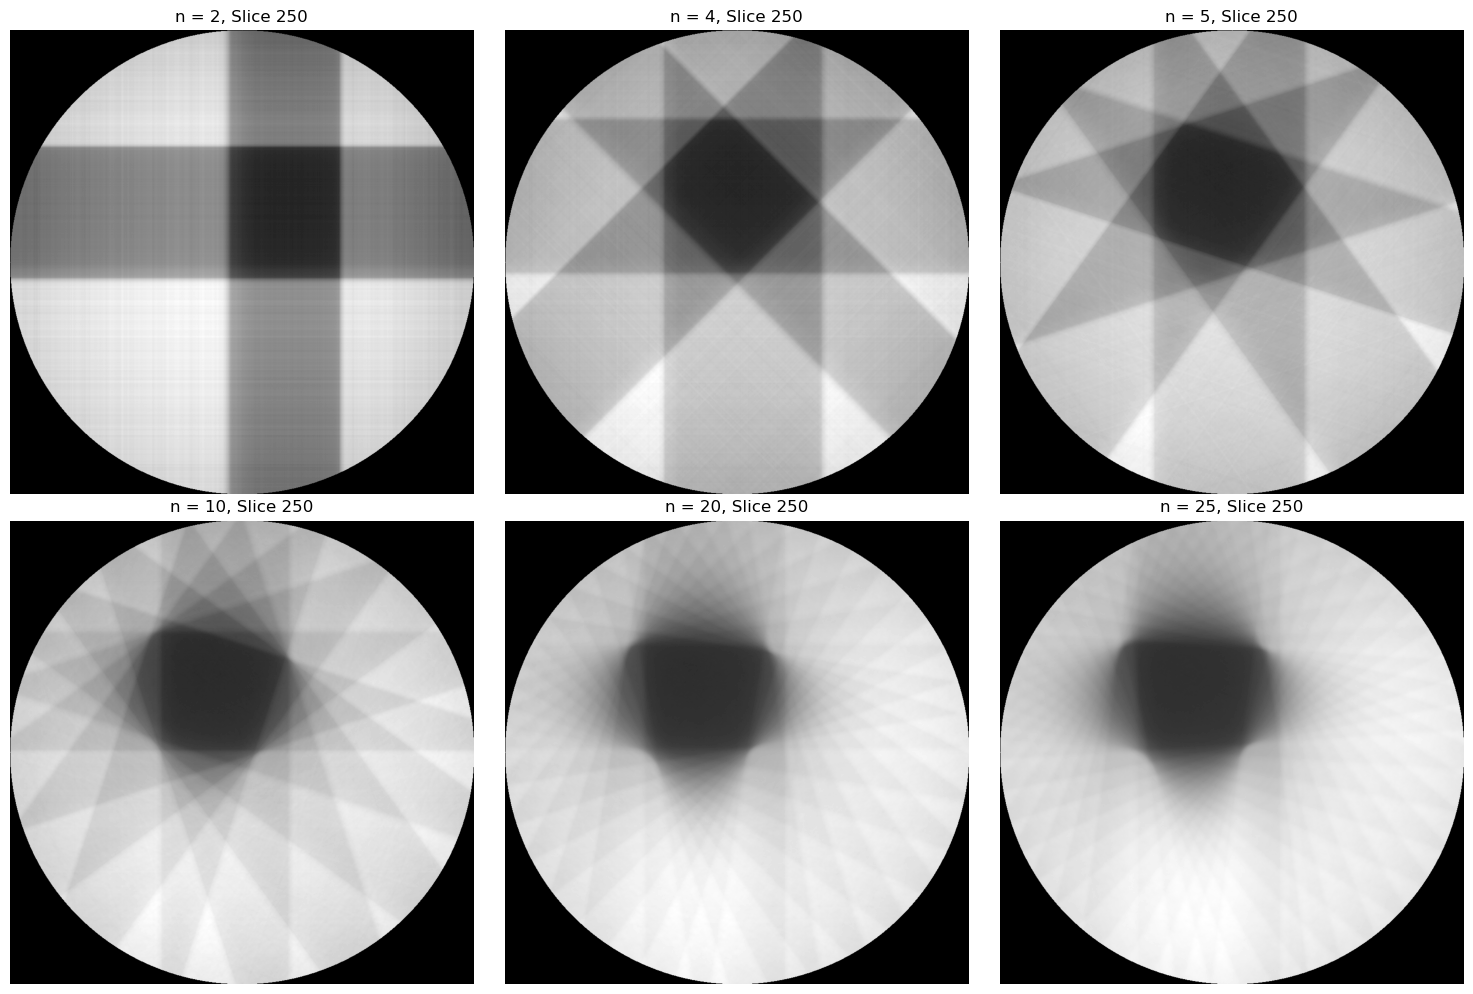

In [22]:
plot_slices(250)

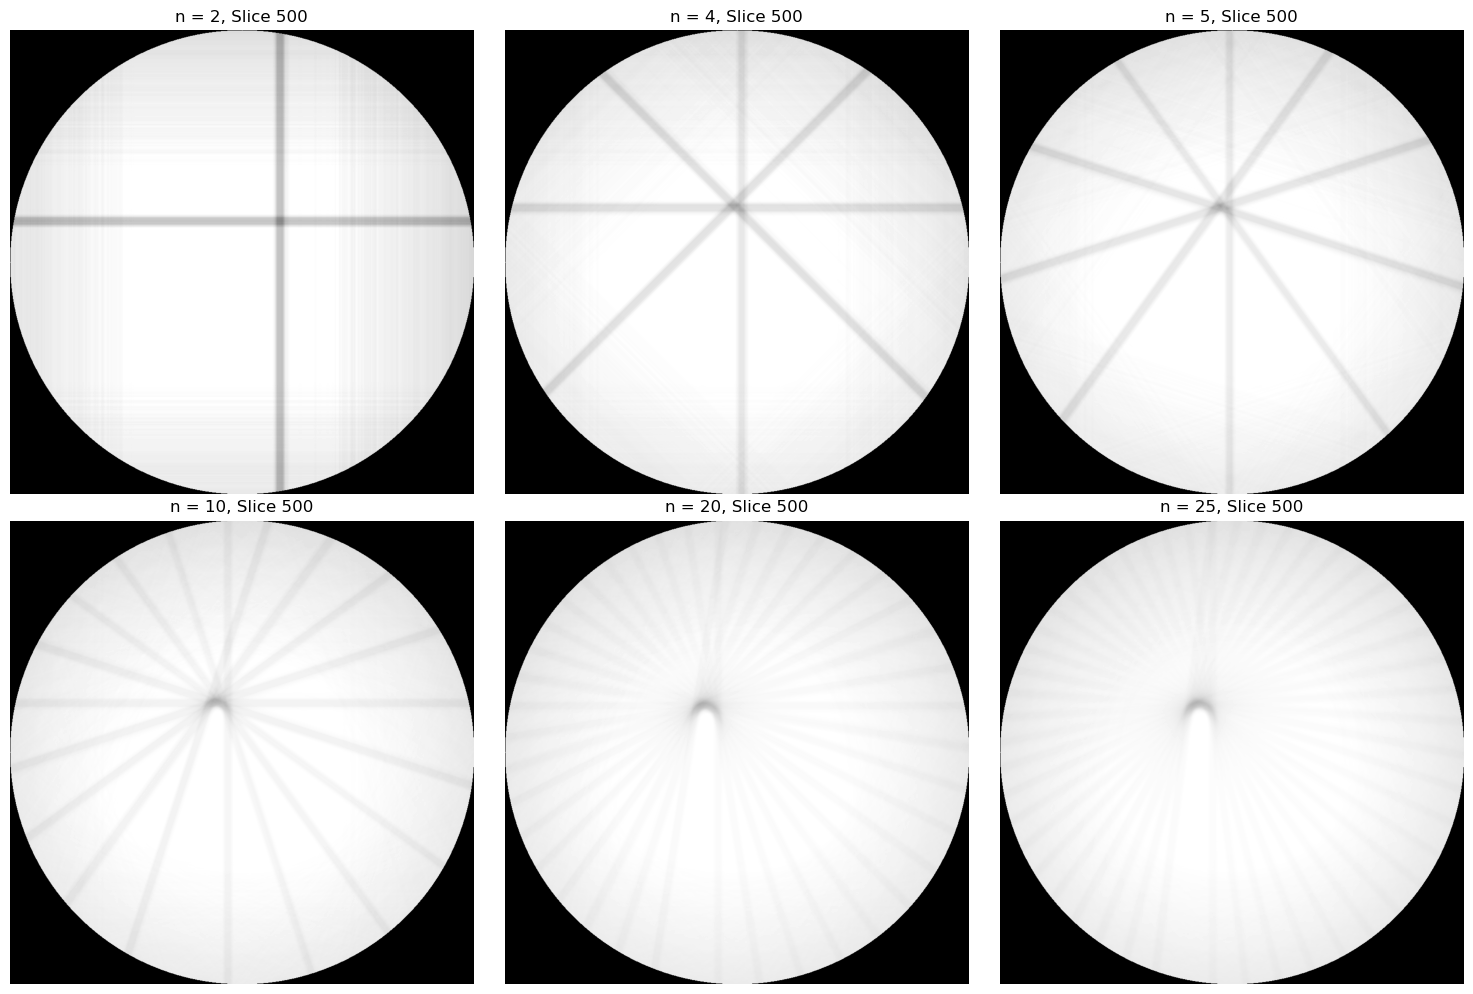

In [23]:
plot_slices(500)

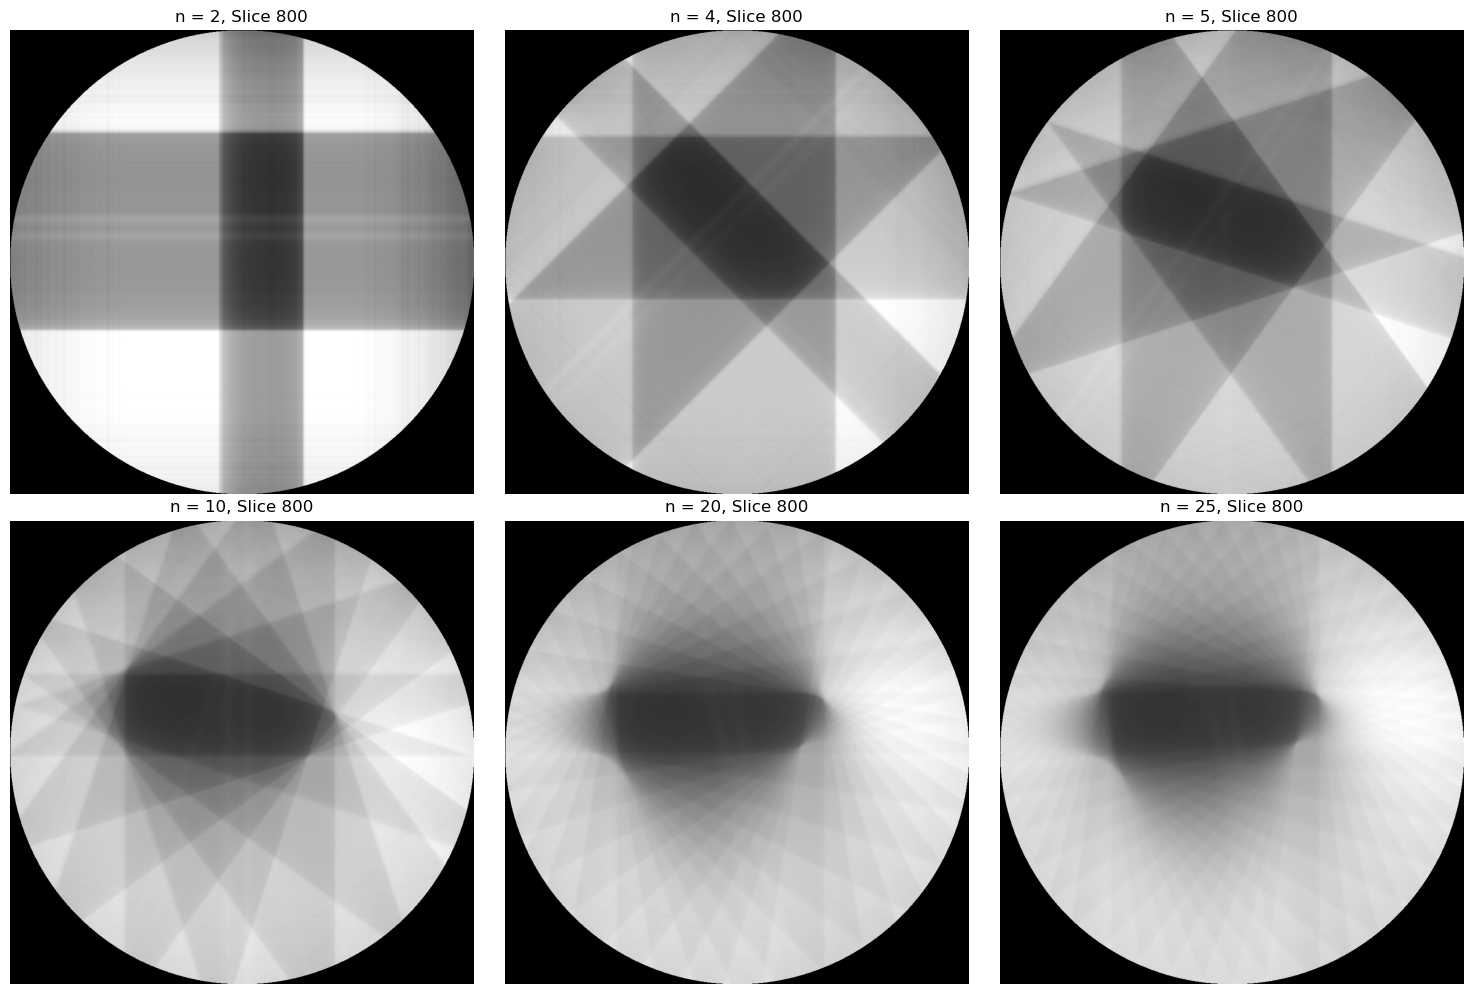

In [24]:
plot_slices(800)

# Criação de GIF do Plano Transverso


In [ ]:
def create_gif(data, gif_name):
    # Defina a lista para armazenar as imagens
    frames = []

    # Varrendo a 3ª dimensão
    for i in range(data.shape[2]):
        # Crie uma figura para plotar a imagem 2D
        plt.imshow(data[:, :, i], cmap='gray')
        plt.axis('off')  # Desliga os eixos

        # Salve a imagem em um objeto PIL
        plt.savefig('temp_image.png', bbox_inches='tight', pad_inches=0)
        plt.close()  # Fecha a figura para não sobrepor as imagens

        # Adiciona a imagem à lista de frames
        img = Image.open('temp_image.png')
        img = img.convert('RGBA')  # Converte para RGBA
        frames.append(img)

    # Salve os frames como um GIF
    if frames:  # Verifica se há frames
        frames[0].save(gif_name, format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

    # Remover a imagem temporária se necessário
    os.remove('temp_image.png')

In [ ]:
create_gif = False
if create_gif = True:
    create_gif(image1, 'transverse_plane_90degrees.gif')
    create_gif(image2,"transverse_plane_45degrees.gif")
    create_gif(image3,"transverse_plane_36degrees.gif")
    create_gif(image4,"transverse_plane_18degrees.gif")
    create_gif(image5,"transverse_plane_9degrees.gif")
    create_gif(image6,"transverse_plane_7_2degrees.gif")

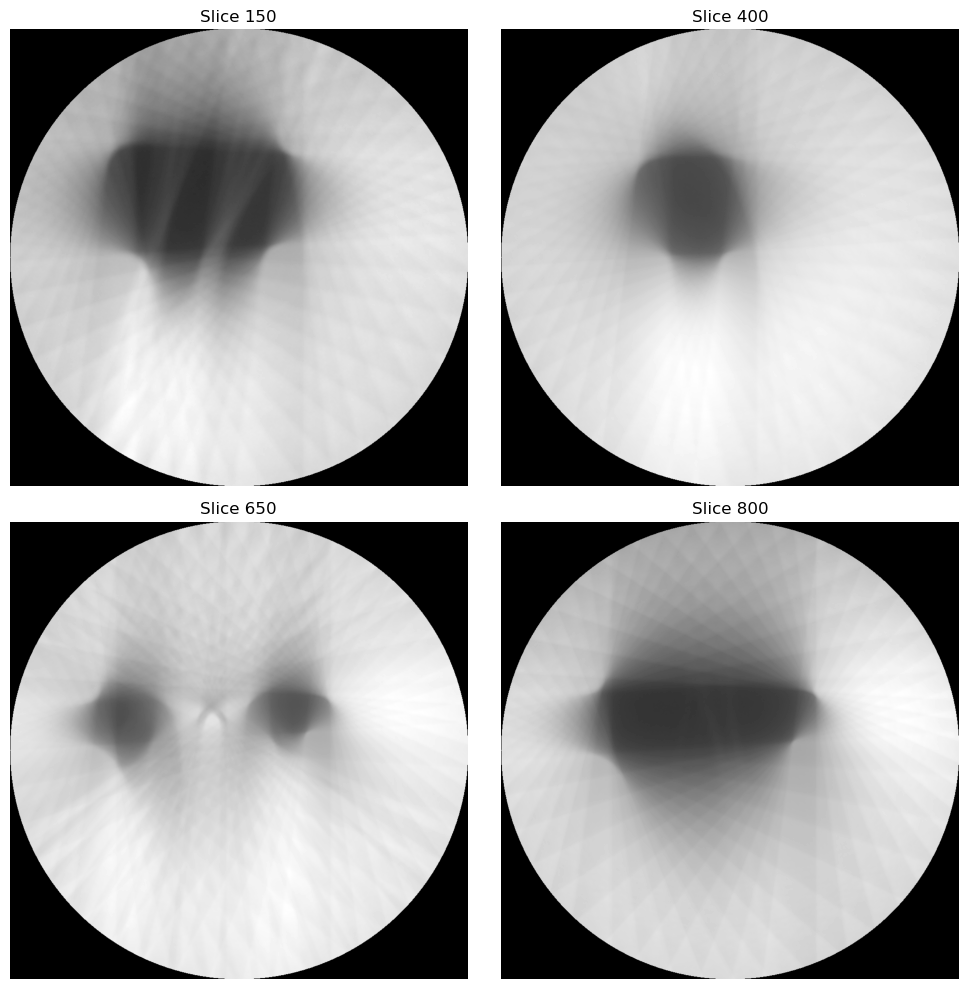

In [13]:
def plot_4_slices(matriz,indices):

    # Criando os subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    for i, ax in enumerate(axs.flat):
        index = indices[i]
        ax.imshow(matriz[:, :, index], cmap='gray')
        ax.set_title(f'Slice {index}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Índices a serem plotados
indices = [150, 400, 650, 800]

plot_4_slices(image6, indices)

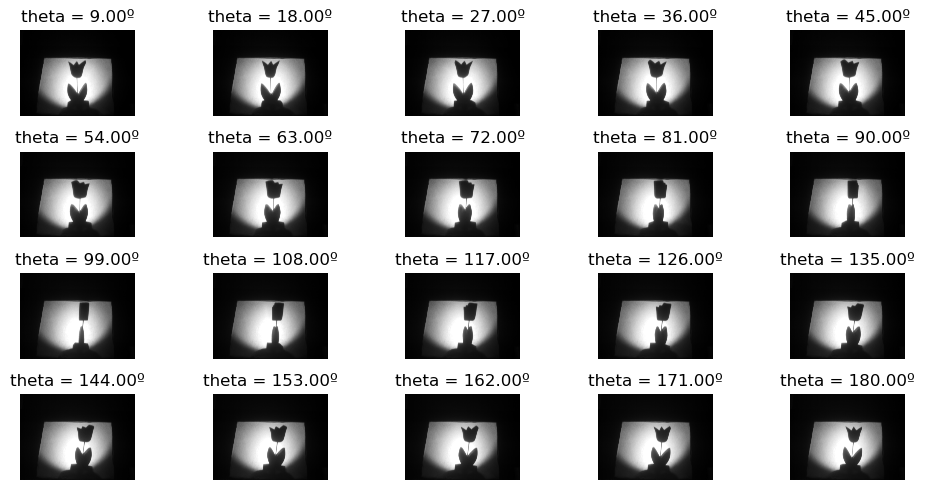

In [54]:
def load_and_plot_images_from_folder(folder):
    images = {}
    keys = []
    for filename in os.listdir(folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # extensões de imagem
            keys.append(filename[:-4]) #Para eliminar os 4 ultimos caracteres, ou a extensao.
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            img = img.convert('L') #Converte a imagem para escala de cinza
            img_variable_name = os.path.splitext(filename)[0]
            images[img_variable_name] = img
    num_images = len(images)
    cols = 5
    rows = (num_images + 1) // cols
    
    fig, axs = plt.subplots(rows, cols, figsize=(10, 5))
    axs = axs.flat if num_images > 1 else [axs]
    
    for i, (key, img) in enumerate(images.items()):
        theta = (180 / (num_images)) * (i+1) 
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'theta = {theta:.2f}º')
        axs[i].axis('off')
    
    # Remove os subplots não utilizados
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()
    

folder_path = './folder_20ang_20240730_093500/'  

load_and_plot_images_from_folder(folder_path)


# Comparação da Centralização do Objeto

In [95]:
#Comparação de Image5 e Image5_centered

def plot_comparativo(image,image_centered,Slice):

    # Seleciona as fatias apropriadas das matrizes
    image1 = image[:, :, Slice]
    image2 = image_centered[:, :, Slice]
    
    # Cria os subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plota a primeira imagem
    axs[0].imshow(image1, cmap='gray')
    axs[0].set_title(f'Disposição 1 - Slice {Slice}')
    axs[0].axis('off')
    
    # Plota a segunda imagem
    axs[1].imshow(image2, cmap='gray')
    axs[1].set_title(f'Disposição 2 - Slice {Slice}')
    axs[1].axis('off')
    
    # Ajusta o layout
    plt.tight_layout()
    plt.show()
    
    return(image1,image2)

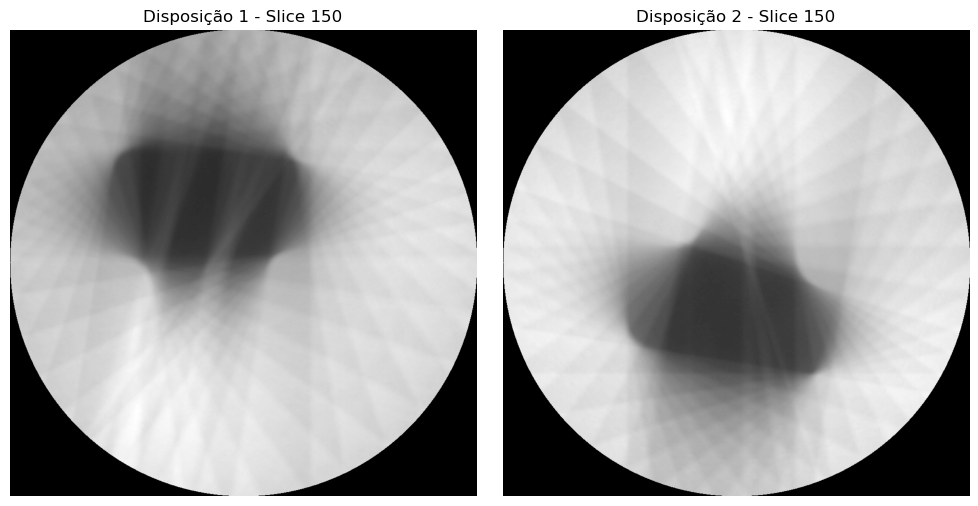

In [96]:
n = 150
foto_normal,foto_centralizada = plot_comparativo(image5,image5_centered,n)

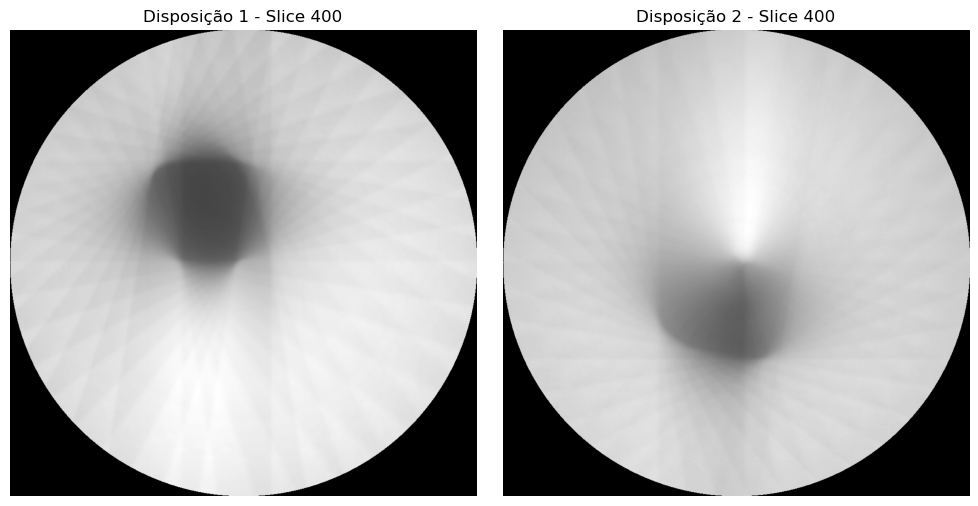

In [97]:
n = 400
foto_normal,foto_centralizada = plot_comparativo(image5,image5_centered,n)

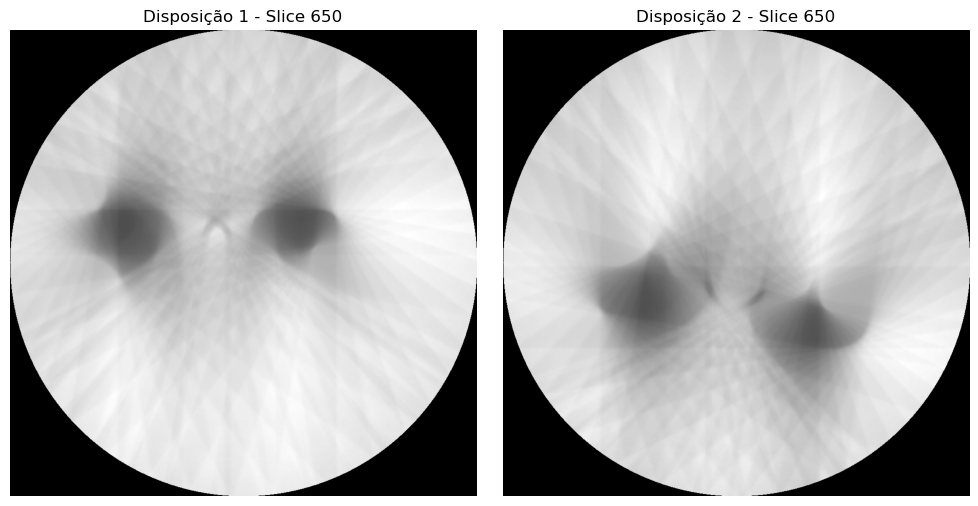

In [98]:
n = 650
foto_normal,foto_centralizada = plot_comparativo(image5,image5_centered,n)

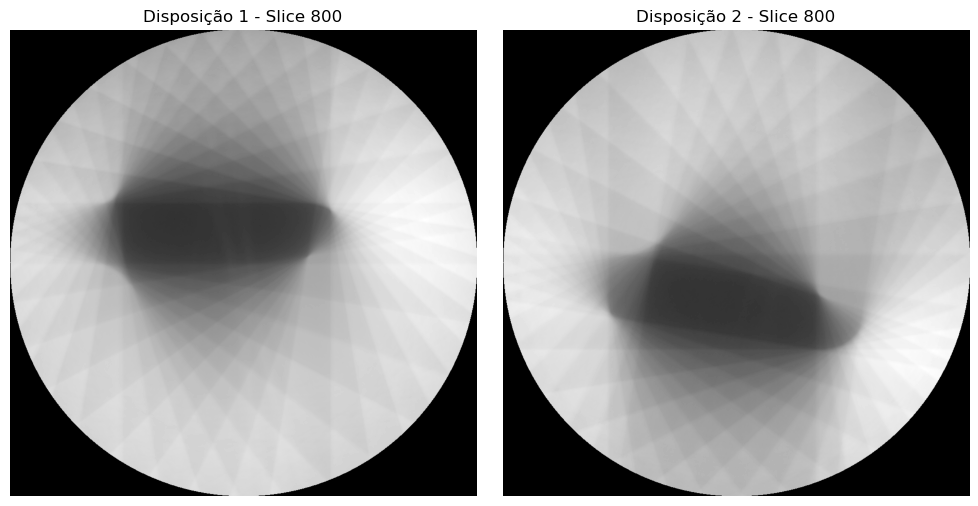

In [99]:
n = 800
foto_normal,foto_centralizada = plot_comparativo(image5,image5_centered,n)